In [2]:
import os

from binance.client import Client

In [1]:
binance_api=

binance_secret=

In [3]:
client = Client(binance_api, binance_secret)

In [4]:
print(client.get_asset_balance(asset='USDT'))

{'asset': 'USDT', 'free': '350.26772107', 'locked': '0.00000000'}


In [5]:
# get latest price from Binance API
coin_price = client.get_symbol_ticker(symbol="BETAUSDT")
# print full output (dictionary)
print(coin_price)

{'symbol': 'BETAUSDT', 'price': '3.21714000'}


In [33]:
print(coin_price["price"])

3.21714000


In [8]:
import pandas as pd
# get timestamp of earliest date data is available
timestamp = client._get_earliest_valid_timestamp('BETAUSDT', '30m')
#timestamp = client._get_latest_valid_timestamp('MIRUSDT', '1m')
#print(timestamp)
timestamp =pd.to_datetime(timestamp/1000, unit='s')

In [24]:
# request historical candle (or klines) data
bars = client.get_historical_klines('BETAUSDT', '5m',str(timestamp))

In [25]:
# delete unwanted data - just keep date, open, high, low, close
for line in bars:
    del line[5:]

In [26]:
import pandas as pd
df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
print(df.head())

            date        open        high         low       close
0  1633694400000  0.06001000  4.00000000  0.06001000  3.37548000
1  1633694700000  3.37548000  3.37886000  3.01824000  3.33905000
2  1633695000000  3.34244000  3.34586000  3.02395000  3.10163000
3  1633695300000  3.10163000  3.11402000  2.59641000  2.68108000
4  1633695600000  2.68108000  3.04027000  2.68049000  3.04026000


In [27]:
import datetime

df['date'] = pd.to_datetime(df['date']/1000, unit='s')
df = df.sort_values('date')
df['Entry'] = range(df.shape[0])
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df.set_index('date', inplace=True)
df = df.loc[:,['Entry', 'open', 'high', 'low', 'close']]

In [28]:
df

,Entry,open,high,low,close
date,,,,,
2021-10-08 12:00:00,0,0.06001,4.00000,0.06001,3.37548
2021-10-08 12:05:00,1,3.37548,3.37886,3.01824,3.33905
2021-10-08 12:10:00,2,3.34244,3.34586,3.02395,3.10163
2021-10-08 12:15:00,3,3.10163,3.11402,2.59641,2.68108
2021-10-08 12:20:00,4,2.68108,3.04027,2.68049,3.04026
2021-10-08 12:25:00,5,3.03506,3.19000,2.93805,3.05895
2021-10-08 12:30:00,6,3.06576,3.09000,2.81000,2.93800
2021-10-08 12:35:00,7,2.93805,3.05000,2.91059,3.00457
2021-10-08 12:40:00,8,3.00458,3.03001,2.92000,2.98730


In [29]:
from mpl_finance import candlestick_ohlc
def plot_chart(df):
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8) #Sell function at colordown
  fig.tight_layout()

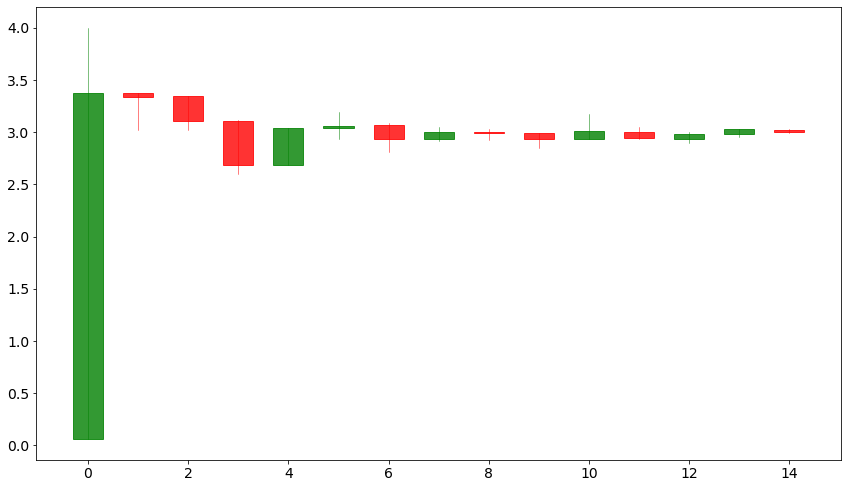

In [30]:
import os
from binance.client import Client
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plot_chart(df)

In [31]:
df_ha = df.copy()
for i in range(df_ha.shape[0]):
    if i > 0:
        df_ha.loc[df_ha.index[i],'open'] = (df['open'][i-1] + df['close'][i-1])/2
df_ha.loc[df_ha.index[i],'close'] = (df['open'][i] + df['close'][i] + df['low'][i] +  df['high'][i])/4
df_ha = df_ha.iloc[1:,:]

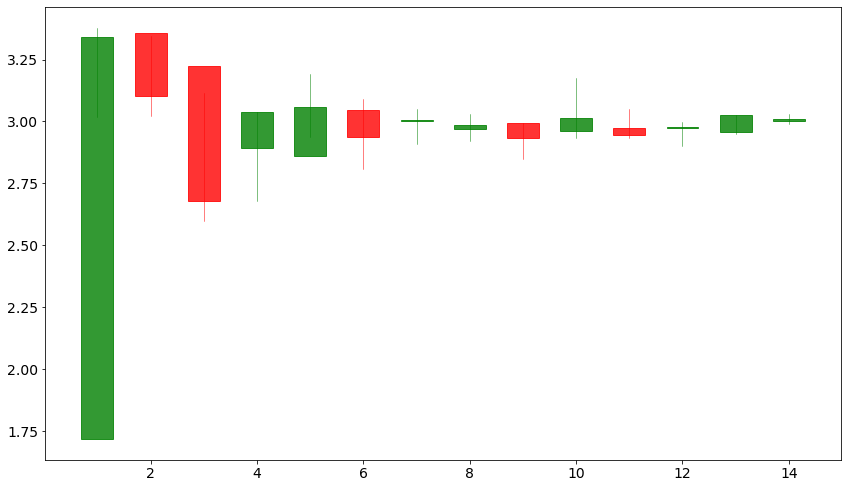

In [32]:
plot_chart(df_ha)

In [ ]:

prev_date=datetime.datetime.utcnow().date()-datetime.timedelta(days=1)
df = pd.DataFrame(self.binance_client.futures_historical_klines(
     symbol=self.symbol,
     interval=interval,
     start_str=str(prev_date)
))
df = df.iloc[:, :6]
# ascribe names to columns
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# convert timestamp to date format and ensure ohlcv are all numeric
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col])

df_ha=heikinashi.HeikinAshi(japanese_data=df)
return df_ha